## Training Code

In [29]:
!pip install tpot tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from joblib import dump
import joblib
from tpot import TPOTClassifier
import numpy as np
from tensorflow.keras.models import load_model

In [5]:
data = pd.read_excel('lung_data.xlsx')
data['Result'] = data['Result'].replace({'YES': 1, 'NO': 0})

In [6]:
X = data.iloc[:, 3:]
y = data['Result']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, 
                      config_dict={'sklearn.neighbors.KNeighborsClassifier': {'n_neighbors': range(1, 11)}})
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.954308617234469

Generation 2 - Current best internal CV score: 0.954308617234469

Generation 3 - Current best internal CV score: 0.954308617234469

Generation 4 - Current best internal CV score: 0.954308617234469

Generation 5 - Current best internal CV score: 0.954308617234469

Best pipeline: KNeighborsClassifier(CombineDFs(input_matrix, input_matrix), n_neighbors=9)


TPOTClassifier(config_dict={'sklearn.neighbors.KNeighborsClassifier': {'n_neighbors': range(1, 11)}},
               generations=5, population_size=50, verbosity=2)

In [9]:
k = tpot.fitted_pipeline_

In [10]:
y_pred_knn = k.predict(X_test)

In [11]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy of KNN:', accuracy_knn)

Accuracy of KNN: 0.946236559139785


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=2)

Epoch 1/50
125/125 - 1s - loss: 19.8467 - accuracy: 0.7565 - val_loss: 14.8030 - val_accuracy: 0.7515 - 1s/epoch - 12ms/step
Epoch 2/50
125/125 - 0s - loss: 10.5885 - accuracy: 0.7856 - val_loss: 9.4193 - val_accuracy: 0.7766 - 254ms/epoch - 2ms/step
Epoch 3/50
125/125 - 0s - loss: 6.4312 - accuracy: 0.7998 - val_loss: 5.7337 - val_accuracy: 0.7786 - 277ms/epoch - 2ms/step
Epoch 4/50
125/125 - 0s - loss: 3.4753 - accuracy: 0.8121 - val_loss: 4.2183 - val_accuracy: 0.8006 - 275ms/epoch - 2ms/step
Epoch 5/50
125/125 - 0s - loss: 2.3643 - accuracy: 0.8297 - val_loss: 3.1955 - val_accuracy: 0.8006 - 263ms/epoch - 2ms/step
Epoch 6/50
125/125 - 0s - loss: 1.5897 - accuracy: 0.8414 - val_loss: 3.3292 - val_accuracy: 0.8226 - 255ms/epoch - 2ms/step
Epoch 7/50
125/125 - 0s - loss: 1.2382 - accuracy: 0.8467 - val_loss: 2.7979 - val_accuracy: 0.8337 - 256ms/epoch - 2ms/step
Epoch 8/50
125/125 - 0s - loss: 1.1644 - accuracy: 0.8537 - val_loss: 2.0954 - val_accuracy: 0.8377 - 229ms/epoch - 2ms/step

In [17]:
y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")

67/67 [==============================] - 1s 3ms/step


In [18]:
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print('Accuracy of ANN:', accuracy_ann)

Accuracy of ANN: 0.9261337073398784


In [19]:
dump(k, 'lung_cancer_knn.joblib')
model.save('lung_cancer_model.h5')

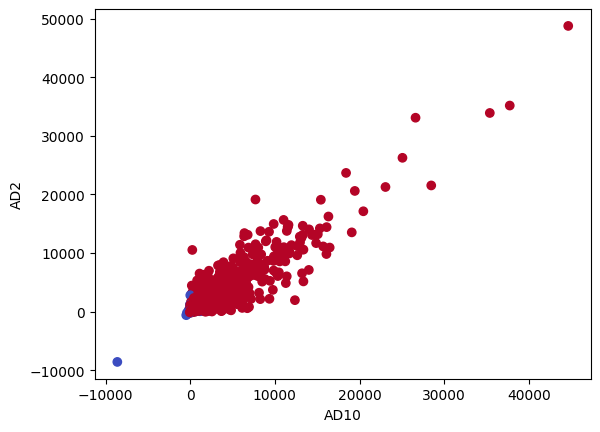

In [20]:
plt.scatter(X['AD10'], X['AD2'], c=y, cmap='coolwarm')
plt.xlabel('AD10')
plt.ylabel('AD2')
plt.show()

In [23]:
!zip -r lung_cancer_model.zip ./lung_*

updating: lung_cancer_knn.joblib (deflated 82%)
updating: lung_cancer_model.h5 (deflated 54%)
updating: lung_cancer_model.joblib (deflated 50%)
  adding: lung_data.xlsx (deflated 0%)


## Testing Code

In [31]:
# Load new data
new_data = pd.read_excel('new_lung_data.xlsx')
new_data['Result'] = new_data['Result'].replace({'YES': 1, 'NO': 0})

X_new = new_data.iloc[:, 3:]
y_new = new_data['Result']

# Load the saved models
loaded_knn = joblib.load('lung_cancer_knn.joblib')
loaded_ann = load_model('lung_cancer_model.h5')

# Make predictions using KNN and ANN
y_pred_knn_new = loaded_knn.predict(X_new)
y_pred_ann_new = (loaded_ann.predict(X_new) > 0.5).astype("int32")

# Calculate accuracy for the new data
accuracy_knn_new = accuracy_score(y_new, y_pred_knn_new)
accuracy_ann_new = accuracy_score(y_new, y_pred_ann_new)

# Print the accuracy
print('Accuracy of KNN for new data:', accuracy_knn_new)
print('Accuracy of ANN for new data:', accuracy_ann_new)

223/223 [==============================] - 0s 1ms/step
Accuracy of KNN for new data: 0.9576378173656894
Accuracy of ANN for new data: 0.9563753682143358
